
# DESC SN Ia metric # 



In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp
import pandas as pd

import rubin_sim.maf as maf
from rubin_sim.data import get_baseline
import time

In [2]:
# Baseline Survey
baseline_file = get_baseline()
runName = os.path.split(baseline_file)[-1].replace('.db', '')

print(runName)

baseline_v2.1_10yrs


In [3]:
# Set up output
outDir = 'sn'
resultsDb = maf.db.ResultsDb(outDir=outDir)

In [4]:
plotDict = {'percentileClip': 95., 'nTicks': 5}

sne_nside = 2
sn_summary = [maf.MedianMetric(), maf.MeanMetric(),
              maf.SumMetric(metricName='Total detected')]
slicer = maf.HealpixSlicer(nside=sne_nside, useCache=False)
metric = maf.SNNSNMetric(verbose=False)  
bundle = maf.MetricBundle(metric, slicer, None, plotDict=plotDict, 
                        summaryMetrics=sn_summary)

bg = maf.MetricBundleGroup({'sn': bundle}, baseline_file, outDir, resultsDb)

Healpix slicer using NSIDE=2, approximate resolution 1758.969043 arcminutes
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 54522 699 78
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 63609 699 91
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/rubin_sim_data/maf/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading

Querying table None with no constraint for columns ['numExposures', 'rotSkyPos', 'observationStartMJD', 'visitTime', 'night', 'filter', 'fieldRA', 'fiveSigmaDepth', 'observationId', 'visitExposureTime', 'fieldDec'].
Found 2081749 visits
Running:  ['sn']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/maps/dustMap.py:42: UserWarning: Slicer value of nside 2 different from map value 128, using slicer value
  warnings.warn(


Completed metric generation.
Running reduce methods.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/plots/plotHandler.py:584: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn(
0.0 180.0 -180.0 180.0


Running summary statistics.
Completed.
Plotting figures with "" constraint now.


0.0 180.0 -180.0 180.0


Plotting complete.
runtime= 208.29401779174805 s


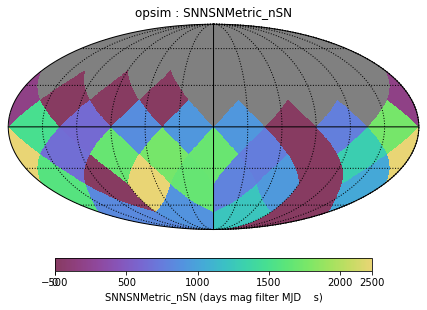

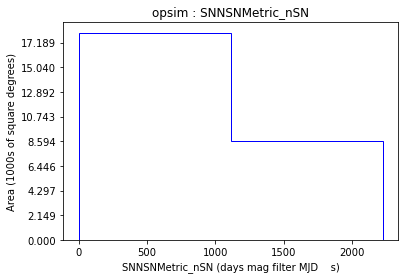

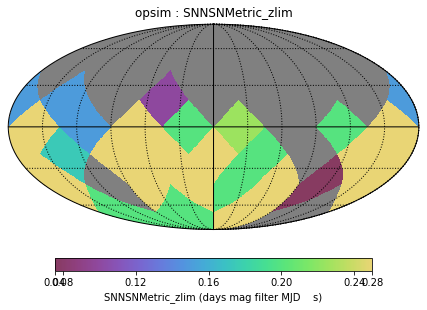

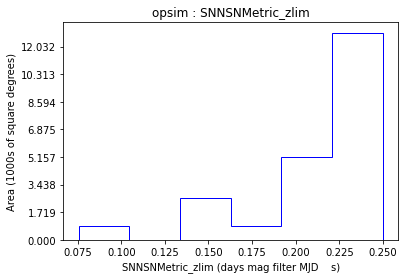

In [5]:
t1 = time.time()
bg.runAll()     
t2 = time.time()
bg.plotAll(closefigs=False)
print('runtime=', t2-t1, 's')

In [6]:
bundle.metricValues.compressed()[0]

array([(13, 0.78539816, 0.33983691, 2, 2.79491176, -0.59257689, 0.27981666, 0.604, 0.1, 0)],
      dtype=[('sid', '<i8'), ('ra', '<f8'), ('dec', '<f8'), ('nside', '<i8'), ('gall', '<f8'), ('galb', '<f8'), ('ebv', '<f8'), ('nSN', '<f8'), ('zlim', '<f8'), ('healpixID', '<i8')])

In [7]:
# The 'reduce' values of the metric got stored in the bundle dict in the bungle group 
bg.bundleDict

{'sn': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7fe2de516070>,
 'SNNSNMetric_nSN': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7fe2de4fef40>,
 'SNNSNMetric_zlim': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7fe28512c430>}

In [8]:
# The nSN and zlim values are pulled out in those reduce methods, into their own bundles.
bdict = bg.bundleDict
print(bdict['SNNSNMetric_nSN'].metricValues.compressed())
np.median(bdict['SNNSNMetric_nSN'].metricValues.compressed())

[ 6.040000e-01 -1.000000e+00  7.431000e+00  1.871690e+02  9.233440e+02
  8.635110e+02  6.313050e+02  1.487006e+03  1.750055e+03  7.689800e+02
 -1.000000e+00  9.264840e+02  1.690268e+03  1.750447e+03  1.685011e+03
  6.524550e+02  2.249280e+03  1.309093e+03 -1.000000e+00  7.637630e+02
  1.675824e+03  2.217322e+03 -1.000000e+00  1.588720e+03  1.030240e+03
  5.131000e+00  9.374220e+02  7.973670e+02  8.995090e+02  8.413110e+02
 -1.000000e+00  1.226191e+03]


881.51

In [9]:
bdict['SNNSNMetric_zlim'].metricValues.compressed()

array([0.1  , 0.15 , 0.15 , 0.2  , 0.25 , 0.15 , 0.25 , 0.25 , 0.2  ,
       0.225, 0.25 , 0.25 , 0.25 , 0.175, 0.25 , 0.25 , 0.2  , 0.25 ,
       0.25 , 0.25 , 0.25 , 0.03 , 0.25 , 0.2  , 0.2  , 0.2  , 0.25 ])